In [1]:
import pandas as pd

# PDF Utilities
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
from pdfminer.pdfpage import PDFPage

# Utilities
from io import StringIO

In [2]:
# Defining the reader function
def convert_pdf_to_text(path):
    """Read PDF file and return a string with
    text"""
    resource_manager = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(resource_manager, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(resource_manager, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [3]:
def clean_text(text):
    """Recieve a text and clean all 
    characters that we don't need"""
    for word in words_to_replace:
        text = text.replace(word, " ")
    for number in range(1, 30):
        text = text.replace(" " * number, " ")
    return text

In [4]:
# Cleaning text for a better text munging
words_to_replace = [
    "\x0c", ".", ",", "\n",
    " i)", "ii", "iii", "iv)", "v)", "vi)", ")",
    " i ", " v ", " vi ", " iv ",
    " a ", " ante ", " en ", " sin ", " so ",
    " con ", " tras ", " mediante ", " versus ",
    " de ", " para ", " vía ", " desde ", " por ", " ha ", " la "
]

In [5]:
# Routes to pdf's files
paths = list()
for index in range(1, 13):
    paths.append(f"pdf{index}.pdf")

paths

['pdf1.pdf',
 'pdf2.pdf',
 'pdf3.pdf',
 'pdf4.pdf',
 'pdf5.pdf',
 'pdf6.pdf',
 'pdf7.pdf',
 'pdf8.pdf',
 'pdf9.pdf',
 'pdf10.pdf',
 'pdf11.pdf',
 'pdf12.pdf']

In [6]:
# Cleaning text
cleaned_texts = list()
for path in paths:
    text = convert_pdf_to_text(path)
    text = clean_text(text)
    text = text.replace("  ", " ")
    cleaned_texts.append(text)
cleaned_texts[0]

' Anuncio Política Monetaria Comunicado Prensa 2 agosto 2018 La Junta Gobierno del Banco México decidido mantener el objetivo Tasa Interés Interbancaria un día un nivel 7 75% Los indicadores disponibles al segundo trimestre 2018 sugieren que economía mundial continuó expandiéndose un ritmo relativamente elevado No obstante se incrementado divergencia el desempeño las principales economías avanzadas En particular contraste zona del euro Japón y el Reino Unido que han crecido debajo lo previsto Estados Unidos actividad económica aceleró su ritmo crecimiento parte respuesta al estímulo fiscal adoptado En un contexto baja holgura esto podría conducir mayores presiones sobre inflación Como se anticipaba Reserva Federal mantuvo cambio el rango objetivo tasa fondos federales su reunión agosto y reiteró su previsión aumentos graduales dicha tasa Cabe señalar que economía mundial está sujeta incertidumbre tanto el corto plazo como mayor medida el mediano plazo Ello debido los riesgos asociados 

In [7]:
# Phrases to seek
phrases_to_seek = [
    "menor volatilidad",
    "mayor volatilidad",
    "actividad económica",
    "economía",
    "perspectivas crediticias",
    "holgura",
    "inflación",
    "inflación subyacente",
    "finanzas públicas",
    "incertidumbre",
    "postura monetaria prudente"
]

if "perspectivas crediticias" in cleaned_texts[0]:
    print("Yeii")
else:
    print("nay")

nay


In [8]:
texts_lists = list()
for text in cleaned_texts:
    text_list = text.split(" ")
    texts_lists.append(text_list)

In [9]:
# Searching phrases in each text
count = 0
universal_counts = list()
for text_list in texts_lists:
    word_count = list()
    for phrase in phrases_to_seek:
        for index in range(len(text_list)):
            word_required = str()
            for number in range(len(phrase.split(" "))):
                try:
                    word_required += text_list[index + number] + " "
                except IndexError:
                    pass
                if (phrase + " ") == word_required:
                    count += 1
        word_count.append(count)
        count = 0
    universal_counts.append(word_count)

In [10]:
universal_counts

[[0, 0, 2, 10, 0, 4, 15, 2, 1, 6, 1],
 [0, 0, 2, 10, 0, 3, 20, 5, 1, 4, 1],
 [0, 0, 2, 11, 0, 2, 19, 3, 2, 4, 1],
 [0, 0, 3, 9, 0, 2, 21, 3, 2, 5, 1],
 [0, 0, 2, 9, 0, 3, 20, 3, 2, 4, 1],
 [0, 0, 2, 9, 0, 3, 22, 3, 2, 5, 1],
 [0, 1, 1, 9, 1, 5, 25, 7, 2, 5, 1],
 [0, 0, 3, 10, 1, 4, 19, 3, 1, 6, 1],
 [0, 0, 3, 8, 1, 5, 19, 4, 1, 6, 1],
 [0, 0, 2, 9, 1, 5, 17, 3, 1, 6, 1],
 [1, 0, 2, 8, 2, 5, 17, 2, 1, 7, 1],
 [0, 0, 2, 9, 2, 6, 15, 1, 2, 6, 1]]

In [11]:
word_count_df = pd.DataFrame({
    "menor volatilidad": [],
    "mayor volatilidad": [],
    "actividad económica": [],
    "economía": [],
    "perspectivas crediticias": [],
    "holgura": [],
    "inflación": [],
    "inflación subyacente": [],
    "finanzas públicas": [],
    "incertidumbre": [],
    "postura monetaria prudente": [],
})

for count in universal_counts:
    temp_df = pd.DataFrame({
        "menor volatilidad": [count[0]],
        "mayor volatilidad": [count[1]],
        "actividad económica": [count[2]],
        "economía": [count[3]],
        "perspectivas crediticias": [count[4]],
        "holgura": [count[5]],
        "inflación": [count[6]],
        "inflación subyacente": [count[7]],
        "finanzas públicas": [count[8]],
        "incertidumbre": [count[9]],
        "postura monetaria prudente": [count[10]],
    })
    word_count_df = word_count_df.append(temp_df, ignore_index=True).astype(int)

In [12]:
word_count_df["economía"] = word_count_df["economía"]*-1

In [13]:
word_count_df["holgura"] = word_count_df["holgura"]*-1

In [14]:
word_count_df["actividad económica"] = word_count_df["actividad económica"]*-1

In [15]:
word_count_df["menor volatilidad"] = word_count_df["menor volatilidad"]*-1

In [16]:
word_count_df["Indice Agregado"] = word_count_df.sum(axis=1)
word_count_df

,menor volatilidad,mayor volatilidad,actividad económica,economía,perspectivas crediticias,holgura,inflación,inflación subyacente,finanzas públicas,incertidumbre,postura monetaria prudente,Indice Agregado
0,0,0,-2,-10,0,-4,15,2,1,6,1,9
1,0,0,-2,-10,0,-3,20,5,1,4,1,16
2,0,0,-2,-11,0,-2,19,3,2,4,1,14
3,0,0,-3,-9,0,-2,21,3,2,5,1,18
4,0,0,-2,-9,0,-3,20,3,2,4,1,16
5,0,0,-2,-9,0,-3,22,3,2,5,1,19
6,0,1,-1,-9,1,-5,25,7,2,5,1,27
7,0,0,-3,-10,1,-4,19,3,1,6,1,14
8,0,0,-3,-8,1,-5,19,4,1,6,1,16
9,0,0,-2,-9,1,-5,17,3,1,6,1,13


In [17]:
#API Banxico
# Dependencies
import requests
import json
import pandas as pd 
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np 
import time
from scipy.stats import linregress
banxico_key = "85c8edeab72128102cdad764f0a2d4532c336d22690a51104b500fb6f077ed4c"

In [18]:
url = "https://www.banxico.org.mx/SieAPIRest/service/v1/series/"

In [19]:
Series = "SF43788"
fecha_inicial = ["2018-8-2/2018-8-3", "2018-10-4/2018-10-5", "2018-11-15/2018-11-16", "2018-12-20/2018-12-21",
                 "2019-2-7/2019-2-8", "2019-3-28/2019-3-29", "2019-5-16/2019-5-17", "2019-6-27/2019-6-28", 
                 "2019-8-15/2019-8-16", "2019-9-26/2019-9-27", "2019-11-14/2019-11-15", "2019-12-19/2019-12-20"]
fxt = []
fxt_1 = []
for fecha in fecha_inicial:
    url_consulta = [f"{url}{Series}/datos/{fecha}?token={banxico_key}"]
    for query in url_consulta: 
        data=requests.get(query).json()
        fxt.append(data["bmx"]["series"][0]["datos"][0]["dato"])
        fxt_1.append(data["bmx"]["series"][0]["datos"][1]["dato"])

In [20]:
Series = "SF43878"
fecha_inicial = ["2018-8-2/2018-8-3", "2018-10-4/2018-10-5", "2018-11-15/2018-11-16", "2018-12-20/2018-12-21",
                 "2019-2-7/2019-2-8", "2019-3-28/2019-3-29", "2019-5-16/2019-5-17", "2019-6-27/2019-6-28", 
                 "2019-8-15/2019-8-16", "2019-9-26/2019-9-27", "2019-11-14/2019-11-15", "2019-12-19/2019-12-20"]
tiie91 = []
tiie91_1 = []
for fecha in fecha_inicial:
    url_consulta = [f"{url}{Series}/datos/{fecha}?token={banxico_key}"]
    for query in url_consulta: 
        data=requests.get(query).json()
        tiie91.append(data["bmx"]["series"][0]["datos"][0]["dato"])
        tiie91_1.append(data["bmx"]["series"][0]["datos"][1]["dato"])

In [52]:
Banxico_dict = {"Tipo de Cambio": fxt, "Tipo de Cambio (t+1)": fxt_1, "Tasa de Interés": tiie91, 
                "Tasa de Interés (t+1)": tiie91_1}
Banxico_data = pd.DataFrame(Banxico_dict)
Banxico_data["Dif Tipo de Cambio"] = 100*(Banxico_data["Tipo de Cambio"].astype(float) - Banxico_data["Tipo de Cambio (t+1)"].astype(float))
Banxico_data["Dif Tasa de Interés"] = 100*(Banxico_data["Tasa de Interés (t+1)"].astype(float) - Banxico_data["Tasa de Interés"].astype(float))
Banxico_data["Fecha"] = fecha_inicial
Banxico_data= Banxico_data[['Fecha', 'Tipo de Cambio', "Dif Tipo de Cambio", 'Tipo de Cambio (t+1)', "Tasa de Interés",
                           "Tasa de Interés (t+1)", "Dif Tasa de Interés"]]
Banxico_data

,Fecha,Tipo de Cambio,Dif Tipo de Cambio,Tipo de Cambio (t+1),Tasa de Interés,Tasa de Interés (t+1),Dif Tasa de Interés
0,2018-8-2/2018-8-3,18.6080,5.60,18.5520,8.1537,8.1550,0.13
1,2018-10-4/2018-10-5,19.1650,27.25,18.8925,8.1600,8.1575,-0.25
2,2018-11-15/2018-11-16,20.2110,12.15,20.0895,8.3228,8.3604,3.76
3,2018-12-20/2018-12-21,19.9285,-1.35,19.9420,8.4750,8.4887,1.37
4,2019-2-7/2019-2-8,19.1375,8.00,19.0575,8.5967,8.5950,-0.17
5,2019-3-28/2019-3-29,19.3440,-6.20,19.4060,8.5040,8.4975,-0.65
6,2019-5-16/2019-5-17,19.0565,-9.30,19.1495,8.5146,8.5150,0.04
7,2019-6-27/2019-6-28,19.1430,-4.80,19.1910,8.4900,8.4833,-0.67
8,2019-8-15/2019-8-16,19.6655,6.85,19.5970,8.3750,8.3350,-4.00
9,2019-9-26/2019-9-27,19.6185,-10.05,19.7190,8.0150,8.0025,-1.25


In [53]:
final_data = Banxico_data.join(word_count_df)
final_data

,Fecha,Tipo de Cambio,Dif Tipo de Cambio,Tipo de Cambio (t+1),Tasa de Interés,Tasa de Interés (t+1),Dif Tasa de Interés,menor volatilidad,mayor volatilidad,actividad económica,economía,perspectivas crediticias,holgura,inflación,inflación subyacente,finanzas públicas,incertidumbre,postura monetaria prudente,Indice Agregado
0,2018-8-2/2018-8-3,18.6080,5.60,18.5520,8.1537,8.1550,0.13,0,0,-2,-10,0,-4,15,2,1,6,1,9
1,2018-10-4/2018-10-5,19.1650,27.25,18.8925,8.1600,8.1575,-0.25,0,0,-2,-10,0,-3,20,5,1,4,1,16
2,2018-11-15/2018-11-16,20.2110,12.15,20.0895,8.3228,8.3604,3.76,0,0,-2,-11,0,-2,19,3,2,4,1,14
3,2018-12-20/2018-12-21,19.9285,-1.35,19.9420,8.4750,8.4887,1.37,0,0,-3,-9,0,-2,21,3,2,5,1,18
4,2019-2-7/2019-2-8,19.1375,8.00,19.0575,8.5967,8.5950,-0.17,0,0,-2,-9,0,-3,20,3,2,4,1,16
5,2019-3-28/2019-3-29,19.3440,-6.20,19.4060,8.5040,8.4975,-0.65,0,0,-2,-9,0,-3,22,3,2,5,1,19
6,2019-5-16/2019-5-17,19.0565,-9.30,19.1495,8.5146,8.5150,0.04,0,1,-1,-9,1,-5,25,7,2,5,1,27
7,2019-6-27/2019-6-28,19.1430,-4.80,19.1910,8.4900,8.4833,-0.67,0,0,-3,-10,1,-4,19,3,1,6,1,14
8,2019-8-15/2019-8-16,19.6655,6.85,19.5970,8.3750,8.3350,-4.00,0,0,-3,-8,1,-5,19,4,1,6,1,16
9,2019-9-26/2019-9-27,19.6185,-10.05,19.7190,8.0150,8.0025,-1.25,0,0,-2,-9,1,-5,17,3,1,6,1,13


In [54]:
final_data = final_data[["Fecha", "inflación", "Indice Agregado", "Tipo de Cambio", "Dif Tipo de Cambio",
                       "Tasa de Interés", "Dif Tasa de Interés", "holgura"]]
final_data["Tipo de Cambio"] = final_data["Tipo de Cambio"].astype(float)
final_data["Tasa de Interés"] = final_data["Tasa de Interés"].astype(float)
final_data

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Fecha,inflación,Indice Agregado,Tipo de Cambio,Dif Tipo de Cambio,Tasa de Interés,Dif Tasa de Interés,holgura
0,2018-8-2/2018-8-3,15,9,18.6080,5.60,8.1537,0.13,-4
1,2018-10-4/2018-10-5,20,16,19.1650,27.25,8.1600,-0.25,-3
2,2018-11-15/2018-11-16,19,14,20.2110,12.15,8.3228,3.76,-2
3,2018-12-20/2018-12-21,21,18,19.9285,-1.35,8.4750,1.37,-2
4,2019-2-7/2019-2-8,20,16,19.1375,8.00,8.5967,-0.17,-3
5,2019-3-28/2019-3-29,22,19,19.3440,-6.20,8.5040,-0.65,-3
6,2019-5-16/2019-5-17,25,27,19.0565,-9.30,8.5146,0.04,-5
7,2019-6-27/2019-6-28,19,14,19.1430,-4.80,8.4900,-0.67,-4
8,2019-8-15/2019-8-16,19,16,19.6655,6.85,8.3750,-4.00,-5
9,2019-9-26/2019-9-27,17,13,19.6185,-10.05,8.0150,-1.25,-5


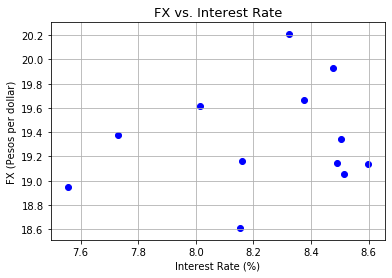

In [55]:
title = f"FX vs. Interest Rate"
plt.scatter(final_data["Tasa de Interés"], final_data["Tipo de Cambio"], marker = "o", color="blue")
plt.title(title, size=13)
plt.xlabel("Interest Rate (%)")
plt.ylabel("FX (Pesos per dollar)")
plt.grid(True)
plt.savefig(f"{title}.png")

The r-squared is: 0.2113168432499716


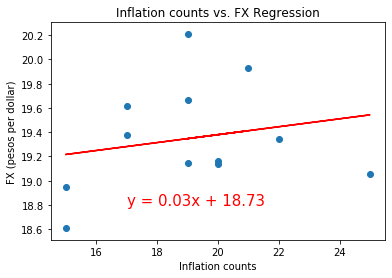

In [56]:
title = "Inflation counts vs. FX Regression"
x = final_data["inflación"]
y = final_data["Tipo de Cambio"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(17,18.8),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Inflation counts')
plt.ylabel("FX (pesos per dollar)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.738249815081074


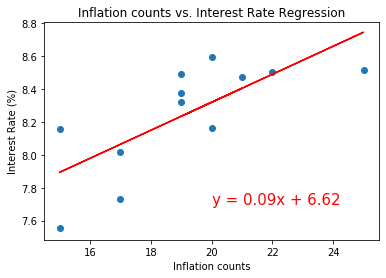

In [57]:
title = "Inflation counts vs. Interest Rate Regression"
x = final_data["inflación"]
y = final_data["Tasa de Interés"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,7.7),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Inflation counts')
plt.ylabel("Interest Rate (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.600024407477726


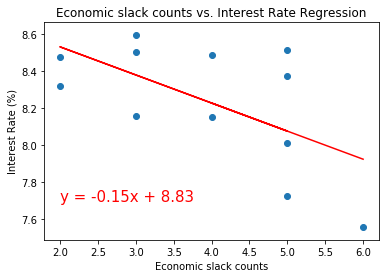

In [58]:
title = "Economic slack counts vs. Interest Rate Regression"
x = final_data["holgura"]*-1
y = final_data["Tasa de Interés"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2,7.7),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Economic slack counts')
plt.ylabel("Interest Rate (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.5924863781279449


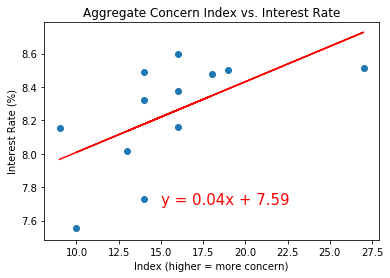

In [59]:
title = "Aggregate Concern Index vs. Interest Rate"
x = final_data["Indice Agregado"]
y = final_data["Tasa de Interés"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(15,7.7),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Index (higher = more concern)')
plt.ylabel("Interest Rate (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.22457872112356864


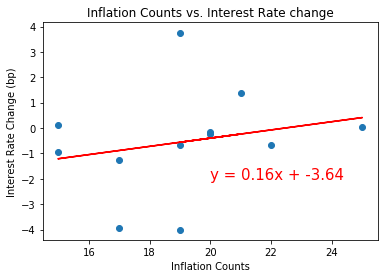

In [65]:
title = "Inflation Counts vs. Interest Rate change"
x = final_data["inflación"]
y = final_data["Dif Tasa de Interés"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,-2),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Inflation Counts')
plt.ylabel("Interest Rate Change (bp)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.6931338683874835


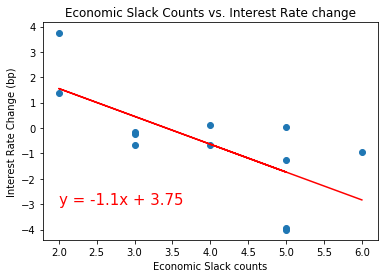

In [68]:
title = "Economic Slack Counts vs. Interest Rate change"
x = final_data["holgura"]*-1
y = final_data["Dif Tasa de Interés"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2,-3),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Economic Slack counts')
plt.ylabel("Interest Rate Change (bp)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()